In [40]:
# %% IMPORTS OF PACKAGES

from os.path import join

import matplotlib.pyplot as plt
import mne
import pandas as pd
import numpy as np

import glob

plt.ion()  # toggle interactive plotting
# import numpy as np

In [41]:
# %% PATHS FOR EXAMPLE ANALYSIS

data_path = "/work/MEG_data"
ID = "0145"
date_stamp = "20240925_000000"
sess = "A"

log_path = join(data_path, 'logfiles')

meg_path = join(data_path, ID, date_stamp, "MEG/001.sessA/files")

subjects_dir = "/work/freesurfer/"
raw_name = "sess" + sess + ".fif"

In [42]:
# %% READ RAW DATA
fname = join(meg_path, raw_name)

In [43]:
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file /work/MEG_data/0145/20240925_000000/MEG/001.sessA/files/sessA.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 35000 ... 762999 =     35.000 ...   762.999 secs
Ready.
Reading 0 ... 727999  =      0.000 ...   727.999 secs...


/tmp/ipykernel_5401/67999550.py:1: RuntimeWarning: This filename (/work/MEG_data/0145/20240925_000000/MEG/001.sessA/files/sessA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


<Info | 23 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 2 EOG, 1 ECG, 11 Internal Active Shielding data (Triux systems), 102 Magnetometers, 204 Gradiometers, 1 misc, 1 Stimulus, 1 System status channel information (Triux systems)
 custom_ref_applied: False
 description: TRIUX system at Aarhus-3103
 dev_head_t: MEG device -> head transform
 dig: 182 items (3 Cardinal, 4 HPI, 175 Extra)
 events: 1 item (list)
 experimenter: Andreas Hojlund (hojlund)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2024-09-25 08:45:54 UTC
 meas_id: 4 items (dict)
 nchan: 323
 proj_id: 1 item (ndarray)
 proj_name: cogsci_teaching
 projs: planar-Raw-0.000-120.000-PCA-01: off, planar- ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>


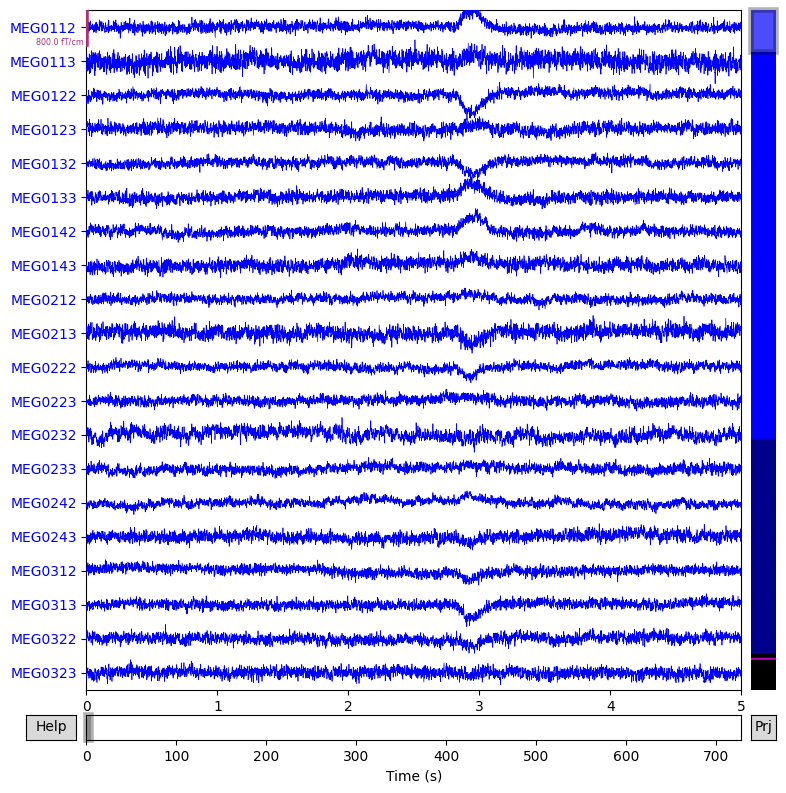

Effective window size : 2.048 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  64 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  61 out of  64 | elapsed:    1.5s remaining:    0.1s


Plotting power spectral density (dB=True).


[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.6s finished


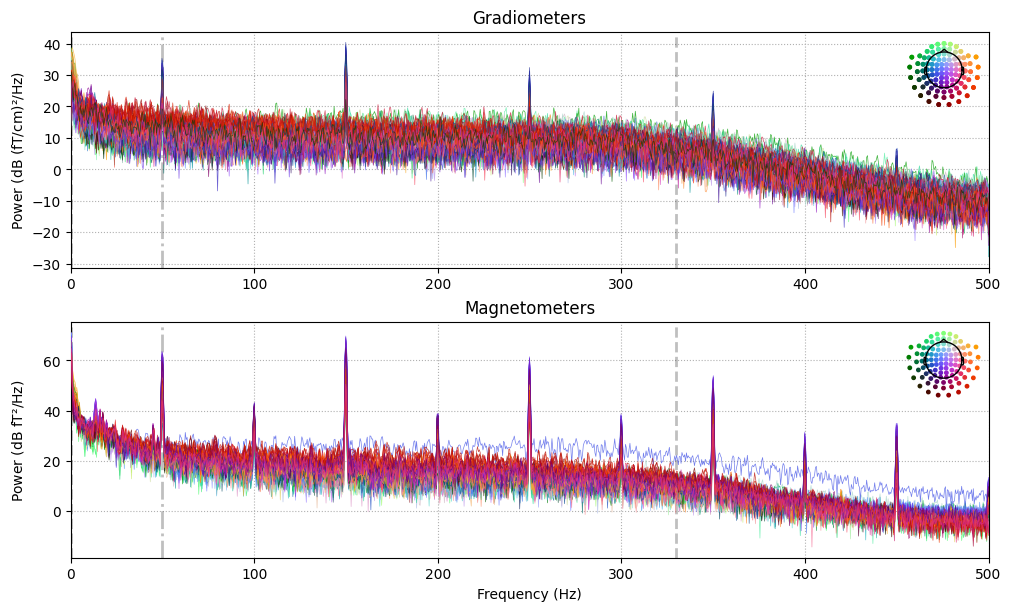

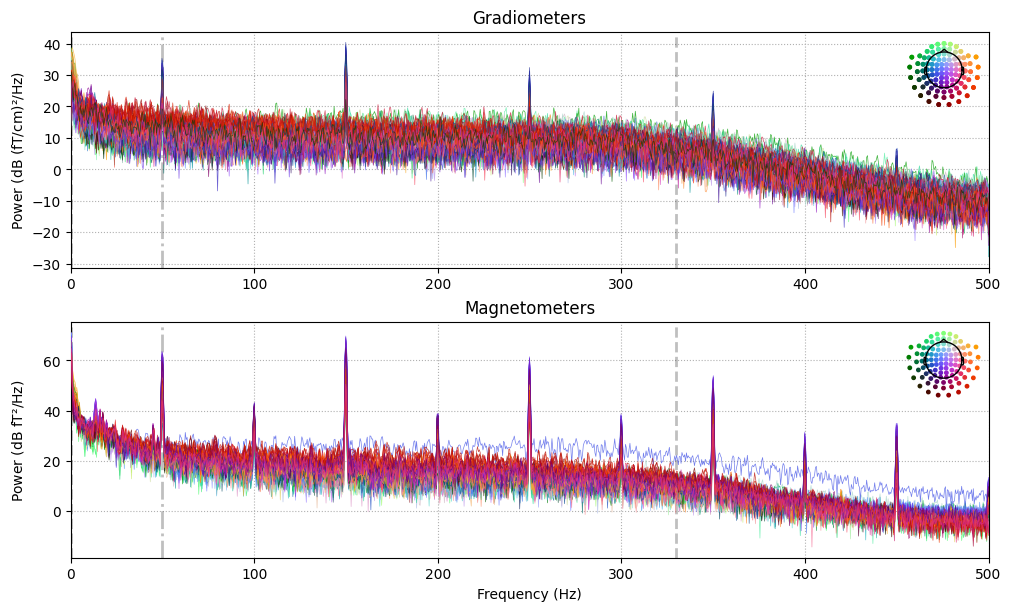

In [44]:
# Inspect the raw data
print(raw.info)
raw.plot(start=0, duration=5, n_channels=20)
raw.compute_psd(n_jobs=-1, tmax=9).plot()

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 204 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 306 out of 306 | elapsed:    8.8s finished


Effective window size : 2.048 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  64 | elapsed:    4.8s remaining:    1.6s


Plotting power spectral density (dB=True).


[Parallel(n_jobs=-1)]: Done  61 out of  64 | elapsed:    5.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    5.7s finished


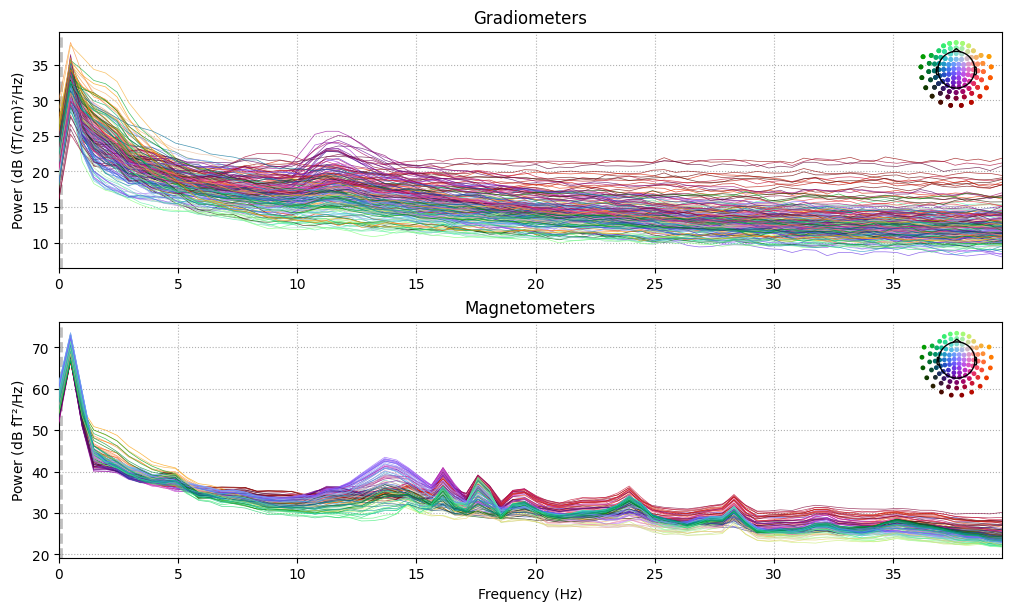

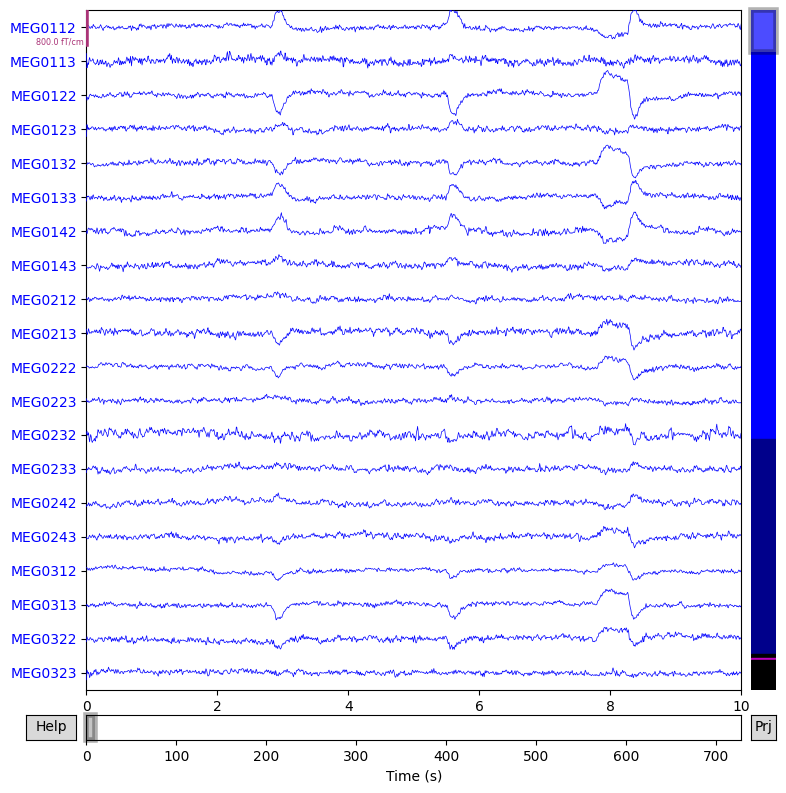

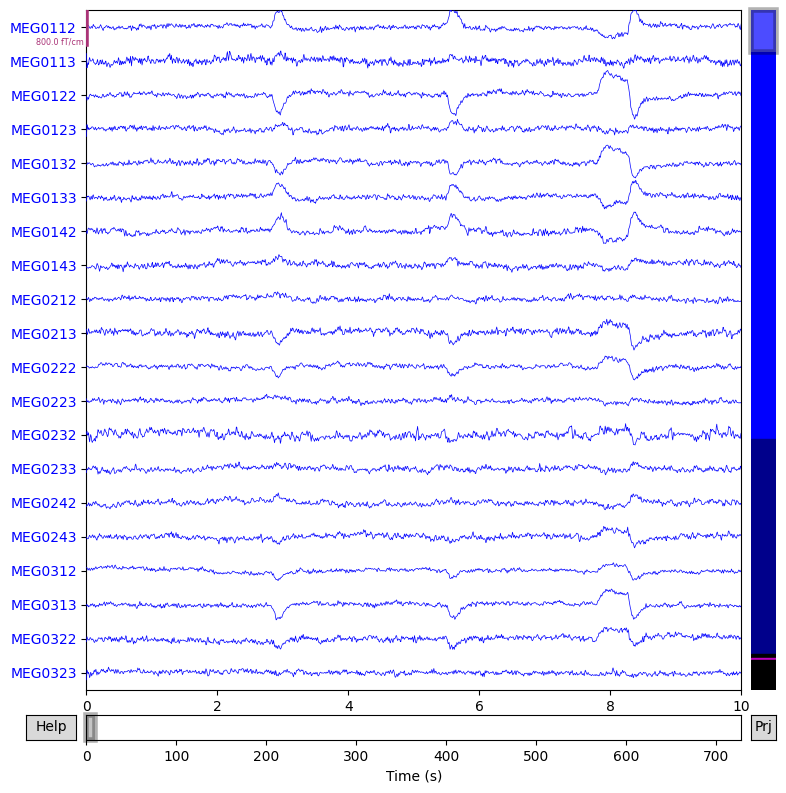

In [45]:
# Filter the raw data to 40 Hz
raw.filter(l_freq=None, h_freq=40, n_jobs=4)
raw.compute_psd(n_jobs=-1, fmax=40).plot()
raw.plot()

In [46]:
sfreq = raw.info['sfreq']

In [47]:
# %% FIND EVENTS

events = mne.find_events(raw, min_duration=0.002, consecutive=True)  ## returns a numpy array

2084 events found on stim channel STI101
Event IDs: [  1   2   3   4  11  12  13  14  15 110 120 126 130 134 140 156 210 211
 220 221 230 231 238 239 240 241 243 246 247 252 254 255]


In [48]:
# due to the online filtering of the MEG data, the square waves that constitute the trigger values 
# in the STI101-channel are sometimes not read very well during this process - and therefore we'll 
# only focus on those triggers that correspond to trigger values that we know are relevant
trigger_vals = [1,2,3,4,110,120,130,140,210,211,220,221,230,231,240,241]
true_events = events[np.isin(events[:,2], trigger_vals),:]

# unfortunately, the STI101-channel is really acting up in this dataset, and therefore multiple of the 
# relevant triggers are sometimes read as repeated values within a few milliseconds... gotta fix that too
# We identify for which rows the difference between two consecutive trigger values is 0 (i.e. they're identical 
# - cuz that shouldn't ever happen (check the event_id to (maybe) make sense of this)
repeat_idx = np.where(np.diff(true_events[:,2])==0)[0]
repeat_idx2 = repeat_idx+1 # we need the index of both the first and the second value in those pairs (it's only the second of the two that we delete)
repeat_combined = [[i, j] for i, j in zip(repeat_idx, repeat_idx2)] # we group indices in pairs for printing

# print to inspect if needed
#print(cropped_events[repeat_combined, 2])
#print(cropped_events[repeat_combined, :])

cropped_events = np.delete(true_events, repeat_idx2, axis=0)

/tmp/ipykernel_5401/1871443732.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(cropped_events, sfreq=raw.info["sfreq"]);  ## #%% SEGMENT DATA INTO EPOCHS


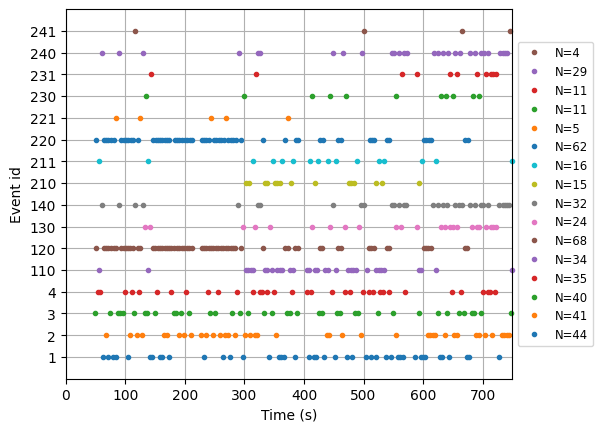

In [49]:
#mne.viz.plot_events(events)  ## samples on x-axis
mne.viz.plot_events(cropped_events, sfreq=raw.info["sfreq"]);  ## #%% SEGMENT DATA INTO EPOCHS

In [52]:
# Do we have 160 deck-screens, deck-selection and win-/loss-screens?
print(len(cropped_events[cropped_events[:,2]<10,2]))
print(len(cropped_events[(cropped_events[:,2]>100) & (cropped_events[:,2]<150), 2]))
print(len(cropped_events[(cropped_events[:,2]>200) & (cropped_events[:,2]<250), 2]))

160
158
153


In [80]:
# Load confidence data
df = pd.read_csv('../in/merged_df_A.csv') 

In [82]:
# cleaning the concatenated logfiles a bit

df_cropped = df.drop(['ID', 'dur_measured_decks', 'offset_decks', 'exp_type', 'offset_win'], axis=1) # throwing out columns with all NaN
df_cropped['deck_marked'] = df_cropped['init_mark'] + 1 # adjusting the indexing of "init_mark" to reflect actual deck-number rather than python index

In [60]:
# quick glance at the deck-screen-labels
df_cropped[['init_mark', 'deck_marked', 'deck_select', 'n_moves','confidence']]

init_mark  deck_marked  deck_select  n_moves  confidence
0            2            3            2        3           0
1            3            4            1        1           0
2            3            4            4        4           0
3            0            1            2        1           1
4            1            2            2        0           0
..         ...          ...          ...      ...         ...
155          1            2            4        2           1
156          1            2            4        2           1
157          1            2            4        2           1
158          1            2            4        2           1
159          2            3            1        2           0

[160 rows x 5 columns]

In [66]:
cropped_events

array([[ 48813,      0,      3],
       [ 50975,      0,    120],
       [ 51401,    252,    220],
       ...,
       [748310,      0,      3],
       [749231,      0,    110],
       [749652,      0,    211]])

In [61]:
# fixing the few deck-screen labels that were messed up due to the trigger values from button presses happening before the screen appearing
print(df_cropped[['deck_marked']].T.to_numpy()[0])
print(cropped_events[cropped_events[:,2]<10,2])

[3 4 4 1 2 1 3 1 1 3 3 3 4 1 2 4 3 2 4 2 3 3 1 1 3 4 1 1 2 2 1 4 3 3 2 3 2
 3 3 1 2 1 2 4 3 2 3 4 2 1 2 2 1 3 2 4 3 1 2 3 2 4 2 2 4 3 2 4 1 3 3 2 1 1
 1 3 2 4 1 3 4 1 4 4 1 3 3 1 2 2 4 4 3 3 2 4 1 4 1 3 3 2 4 1 4 1 4 4 3 4 4
 1 3 1 3 2 1 1 1 4 1 3 1 1 1 2 2 2 2 2 1 1 2 2 1 4 2 1 3 4 3 1 1 3 3 2 2 3
 4 2 4 4 2 4 1 2 2 2 2 3]
[3 4 4 1 2 1 3 1 1 3 3 3 4 1 2 4 3 2 4 2 3 3 1 1 3 4 1 1 2 2 1 4 3 3 2 3 2
 4 3 2 2 1 2 4 3 2 3 4 2 1 2 2 1 3 2 4 3 1 2 3 2 4 2 2 4 4 3 4 1 3 4 2 1 1
 1 3 3 4 1 3 4 1 4 1 1 3 3 1 2 2 4 1 3 3 2 4 1 4 1 3 3 2 4 1 4 1 4 1 3 4 4
 1 4 1 3 2 1 1 1 4 1 3 1 1 1 2 2 2 2 3 1 1 2 3 1 4 2 2 3 4 3 1 1 3 3 2 2 3
 4 2 4 4 2 4 1 2 2 2 2 3]


In [62]:
#This is the structure of interesting triggers / events
event_id = {'Visual/Deck/One': 1, # Decks presented, deck 1 marked
            'Visual/Deck/Two': 2, # Deck 2 marked
            'Visual/Deck/Three': 3, # Deck 3 marked
            'Visual/Deck/Four': 4, # Deck 4 marked
            'Visual/Win/One': 210, # Win screen, deck 1
            'Visual/Win/Two': 220, # Win screen, deck 2
            'Visual/Win/Three': 230, # Win screen, deck 3
            'Visual/Win/Four': 240, # Win screen, deck 4
            'Visual/Loss/One': 211, # Loss screen, deck 1
            'Visual/Loss/Two': 221, # Loss screen, deck 2
            'Visual/Loss/Three': 231, # Loss screen, deck 3
            'Visual/Loss/Four': 241, # Loss screen, deck 4
            'Response/Switch/First': 11, # y button press (switch), first
            'Response/Switch/Second': 12, # y button press, second
            'Response/Switch/Third': 13, # y button press, third
            'Response/Switch/Fourth': 14, # y button press, fourth
            'Response/Select/One': 110, # b button press (select), deck 1
            'Response/Select/Two': 120, # b button press, deck 2
            'Response/Select/Three': 130, # b button press, deck 3
            'Response/Select/Four': 140, # b button press, deck 4
            'low_conf': 300,
            'high_conf': 301
              }   


In [63]:
#Segment the data into epochs
#Epochs can be rejected, if the signal exceeds the range that is expected. Read more here: https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs
# reject = dict(mag=4e-12, grad=4000e-13, eog=250e-6) # T, T/m, V   #You can try it out
reject = None    #Otherwise, all epochs are kept
#Create the epochs around the events. tmin is the time before the event, and tmax the time after the event.
epochs = mne.Epochs(
    raw,
    events,
    event_id,
    on_missing='warn',   #only report on missing events in data, but continue script
    tmin=-0.200,
    tmax=1.000,
    baseline=(None, 0),
    reject=reject,
    preload=True,
    proj=False,
)  ## have proj True, if you wanna reject


Not setting metadata
1235 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
Using data from preloaded Raw for 1235 events and 1201 original time points ...


/tmp/ipykernel_5401/3688426304.py:6: RuntimeWarning: No matching events found for low_conf (event id 300)
  epochs = mne.Epochs(
/tmp/ipykernel_5401/3688426304.py:6: RuntimeWarning: No matching events found for high_conf (event id 301)
  epochs = mne.Epochs(


0 bad epochs dropped


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


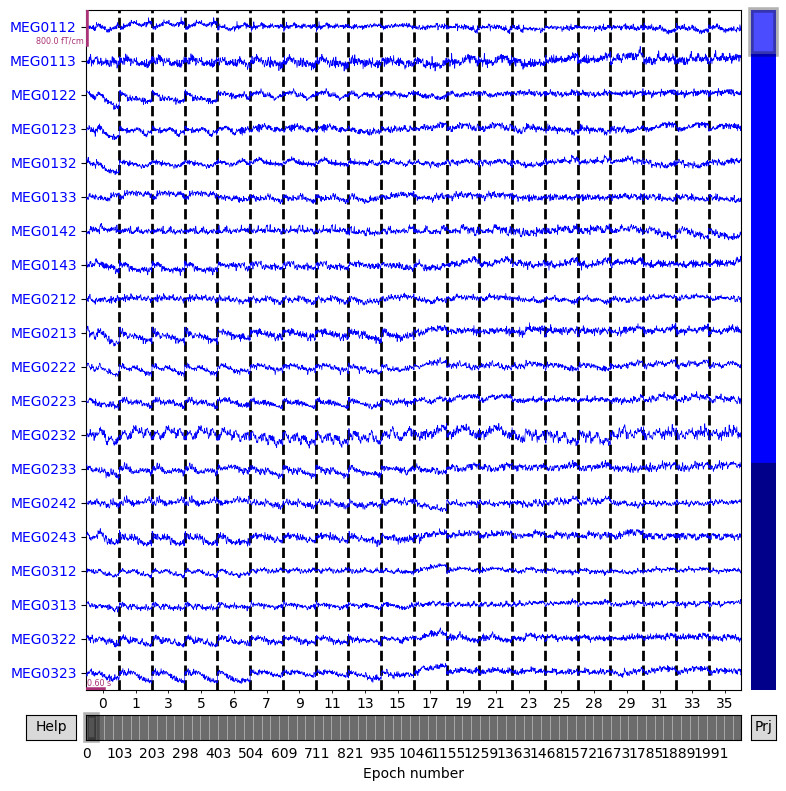

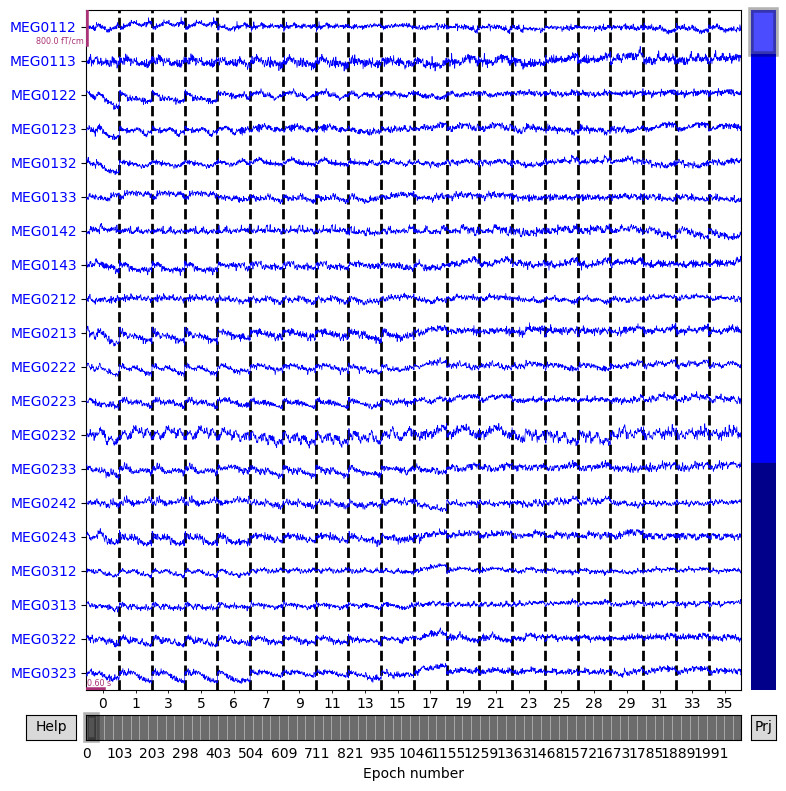

In [64]:
#Pick only MEG channels
epochs.pick_types(meg=True, eog=False, ias=False, emg=False, misc=False, stim=False, syst=False)

#show the epochs
epochs.plot()

In [97]:
df_cropped

rt_select condition  dur_decks  total  frames_before_decks  no  \
0     2.173932  iowa_exp        600    100                   72   1   
1     1.216645  iowa_exp        600    -50                   72   2   
2     1.758387  iowa_exp        600      0                   72   3   
3     0.799233  iowa_exp        600    100                   72   4   
4     0.708015  iowa_exp        600    200                   72   5   
..         ...       ...        ...    ...                  ...  ..   
155   0.807457  iowa_exp        600   1100                   72  36   
156   0.715877  iowa_exp        600   1150                   72  37   
157   0.765861  iowa_exp        600   1200                   72  38   
158   0.750153  iowa_exp        600   1000                   72  39   
159   0.932614  iowa_exp        600    850                   72  40   

       t_select  loss   onset_win  frames_after_decks  ...  section  \
0      3.172599     0    3.572519                  48  ...        A   
1      7.408175  -250    7.807490                  48  ...        A   
2     12.243241     0   12.642702                  48  ...        A   
3     16.052653     0   16.452517                  48  ...        A   
4     19.804502     0   20.203986                  48  ...        A   
..          ...   ...         ...                 ...  ...      ...   
155  147.878295     0  148.278317                  48  ...        A   
156  151.746569     0  152.146468                  48  ...        A   
157  155.614680     0  156.014671                  48  ...        A   
158  159.433809  -250  159.841100                  48  ...        A   
159  163.526119  -250  163.926066                  48  ...        A   

     mean_rt_participant  residuals  adjusted_residuals  trials switches  \
0               1.055818   0.926398            1.375367      40       12   
1               1.055818   0.401146            0.850115      40       12   
2               1.055818   0.294835            0.743805      40       12   
3               1.055818  -0.016266            0.432704      40       12   
4               1.055818   0.108533            0.557503      40       12   
..                   ...        ...                 ...     ...      ...   
155             1.055818  -0.224059            0.224910      40       24   
156             1.055818  -0.315639            0.133330      40       24   
157             1.055818  -0.265656            0.183314      40       24   
158             1.055818  -0.281363            0.167606      40       24   
159             1.055818  -0.098902            0.350067      40       24   

     switch_frequency  confidence_value confidence  deck_marked  
0                 0.3          0.412610          0            3  
1                 0.3          0.255035          0            4  
2                 0.3          0.223141          0            4  
3                 0.3          0.129811          1            1  
4                 0.3          0.167251          0            2  
..                ...               ...        ...          ...  
155               0.6          0.134946          1            2  
156               0.6          0.079998          1            2  
157               0.6          0.109988          1            2  
158               0.6          0.100564          1            2  
159               0.6          0.210040          0            3  

[160 rows x 28 columns]

/tmp/ipykernel_5401/1871443732.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(cropped_events, sfreq=raw.info["sfreq"]);  ## #%% SEGMENT DATA INTO EPOCHS


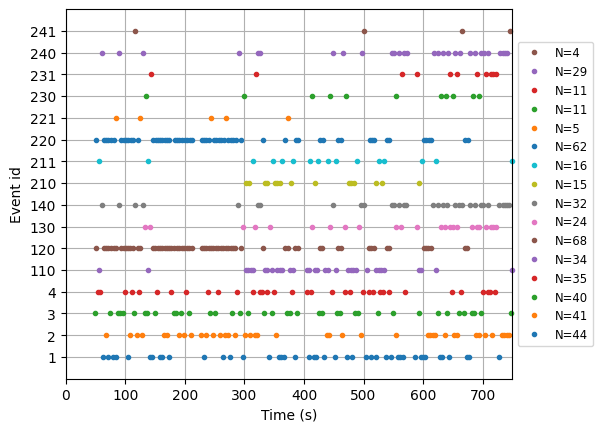

In [65]:
#mne.viz.plot_events(events)  ## samples on x-axis
mne.viz.plot_events(cropped_events, sfreq=raw.info["sfreq"]);  ## #%% SEGMENT DATA INTO EPOCHS

/tmp/ipykernel_5401/399152525.py:39: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events_combined, sfreq=raw.info["sfreq"]);


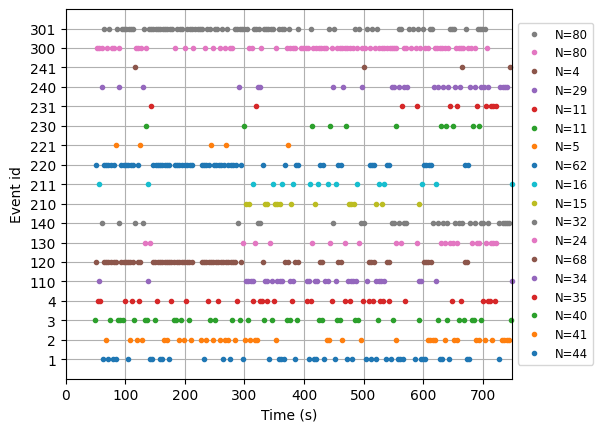

Not setting metadata
160 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 160 events and 701 original time points ...
0 bad epochs dropped


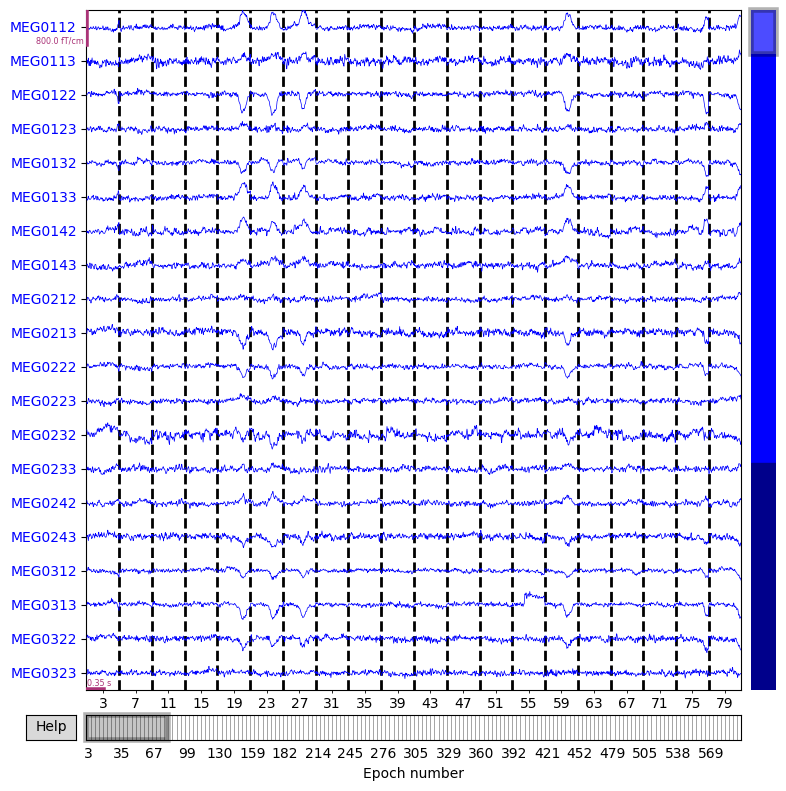

In [96]:
# Inputting df["confidence"] as a trigger in the events for MNE

# Recompute continuous t_select
continuous_t_select = []
current_offset = 0
for i, row in df.iterrows():
    if i > 0 and row['t_select'] < df.loc[i - 1, 't_select']:
        # Detected a restart, add the previous max to the offset
        current_offset += df.loc[i - 1, 't_select']
    continuous_t_select.append(row['t_select'] + current_offset)

df['continuous_t_select'] = continuous_t_select

# Offset to align with the start of MEG events
first_meg_event_sample = cropped_events[0, 0]
first_meg_event_time = first_meg_event_sample / sfreq

df['aligned_t_select'] = df['continuous_t_select'] + first_meg_event_time

# Add "confidence" data to events
confidence_events = []
for i, row in df.iterrows():
    # Define onset time in samples by multiplying aligned_t_select by sfreq (assuming aligned_t_select is in seconds)
    onset_sample = int(row['aligned_t_select'] * sfreq)  # Convert seconds to samples for proper alignment (sfreq = 1000 Hz)
    if onset_sample >= len(raw):  # Ensure the onset sample is within the length of the raw data
        continue
    confidence_value = 300 if row['confidence'] == 0 else 301
    confidence_events.append([onset_sample, 0, confidence_value])

confidence_events = np.array(confidence_events)

# Combine MEG events with confidence events
events_combined = np.vstack((cropped_events, confidence_events))

# Sort events by time
events_combined = events_combined[np.argsort(events_combined[:, 0])]

# Plot the combined events
mne.viz.plot_events(events_combined, sfreq=raw.info["sfreq"]);

# Create epochs using combined events
event_id = {"low_confidence": 300, "high_confidence": 301}
epochs = mne.Epochs(raw, events_combined, event_id, tmin=-0.2, tmax=0.5, preload=True)
epochs.plot();

/tmp/ipykernel_5401/2670454967.py:37: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events_combined, sfreq=raw.info["sfreq"]);


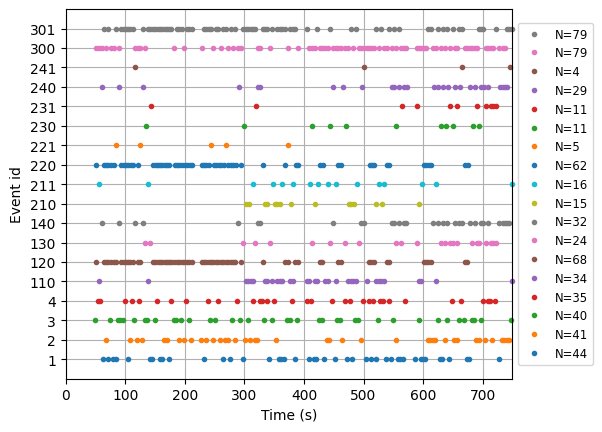

Not setting metadata
158 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 158 events and 701 original time points ...
0 bad epochs dropped


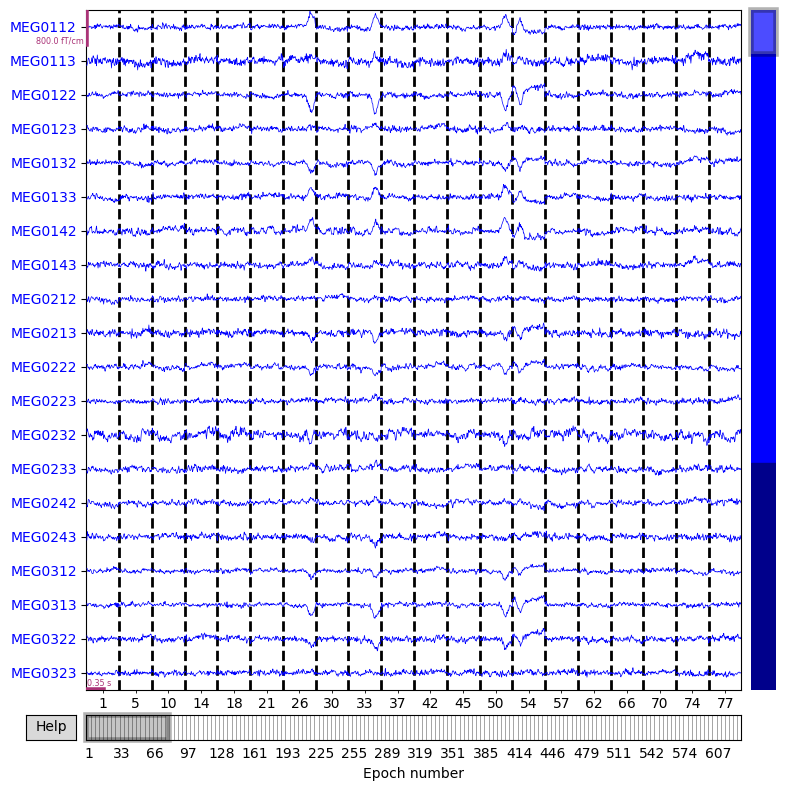

In [125]:
# Inputting df["confidence"] as a trigger in the events for MNE

# Recompute continuous t_select
continuous_t_select = []
current_offset = 0
for i, row in df.iterrows():
    if i > 0 and row['t_select'] < df.loc[i - 1, 't_select']:
        # Detected a restart, add the previous max to the offset
        current_offset += df.loc[i - 1, 't_select']
    continuous_t_select.append(row['t_select'] + current_offset)

df['continuous_t_select'] = continuous_t_select

# Align confidence events with 'Response/Select' events
select_event_codes = [110, 120, 130, 140]
select_events = cropped_events[np.isin(cropped_events[:, 2], select_event_codes)]

# Ensure alignment by taking the minimum length between select events and dataframe rows
min_length = min(len(select_events), len(df))

# Add "confidence" data to events
confidence_events = []
for i in range(min_length):
    onset_sample = select_events[i, 0]  # Use the onset sample of the corresponding 'Response/Select' event
    confidence_value = 300 if df.iloc[i]['confidence'] == 0 else 301
    confidence_events.append([onset_sample, 0, confidence_value])

confidence_events = np.array(confidence_events)

# Combine MEG events with confidence events
events_combined = np.vstack((cropped_events, confidence_events))

# Sort events by time
events_combined = events_combined[np.argsort(events_combined[:, 0])]

# Plot the combined events
mne.viz.plot_events(events_combined, sfreq=raw.info["sfreq"]);

# Create epochs using combined events
event_id = {"low_confidence": 300, "high_confidence": 301}
epochs = mne.Epochs(raw, events_combined, event_id, tmin=-0.2, tmax=0.5, preload=True, event_repeated='merge')
epochs.plot();

In [103]:
#This is the structure of interesting triggers / events
event_id = {'Visual/Deck/One': 1, # Decks presented, deck 1 marked
            'Visual/Deck/Two': 2, # Deck 2 marked
            'Visual/Deck/Three': 3, # Deck 3 marked
            'Visual/Deck/Four': 4, # Deck 4 marked
            'Visual/Win/One': 210, # Win screen, deck 1
            'Visual/Win/Two': 220, # Win screen, deck 2
            'Visual/Win/Three': 230, # Win screen, deck 3
            'Visual/Win/Four': 240, # Win screen, deck 4
            'Visual/Loss/One': 211, # Loss screen, deck 1
            'Visual/Loss/Two': 221, # Loss screen, deck 2
            'Visual/Loss/Three': 231, # Loss screen, deck 3
            'Visual/Loss/Four': 241, # Loss screen, deck 4
            'Response/Switch/First': 11, # y button press (switch), first
            'Response/Switch/Second': 12, # y button press, second
            'Response/Switch/Third': 13, # y button press, third
            'Response/Switch/Fourth': 14, # y button press, fourth
            'Response/Select/One': 110, # b button press (select), deck 1
            'Response/Select/Two': 120, # b button press, deck 2
            'Response/Select/Three': 130, # b button press, deck 3
            'Response/Select/Four': 140, # b button press, deck 4
            'low_conf': 300,
            'high_conf': 301,
              }   


In [112]:
events.shape

(2084, 3)

In [114]:
cropped_events.shape

(471, 3)

In [111]:
events_combined.shape

(629, 3)

In [128]:
#Segment the data into epochs
#Epochs can be rejected, if the signal exceeds the range that is expected. Read more here: https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs
# reject = dict(mag=4e-12, grad=4000e-13, eog=250e-6) # T, T/m, V   #You can try it out
reject = None    #Otherwise, all epochs are kept
#Create the epochs around the events. tmin is the time before the event, and tmax the time after the event.
epochs = mne.Epochs(
    raw,
    events_combined,
    event_id,
    on_missing='warn',   #only report on missing events in data, but continue script
    tmin=-0.200,
    tmax=1.000,
    baseline=(None, 0),
    reject=reject,
    preload=True,
    proj=False,
    event_repeated = 'error'
)  ## have proj True, if you wanna reject


Not setting metadata
158 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
Using data from preloaded Raw for 158 events and 1201 original time points ...
0 bad epochs dropped


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


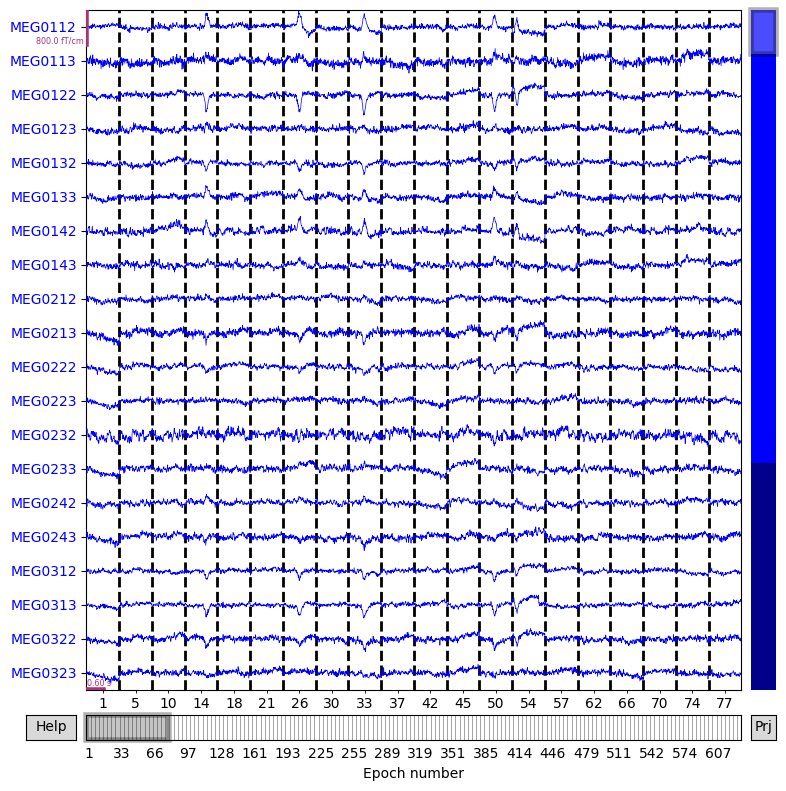

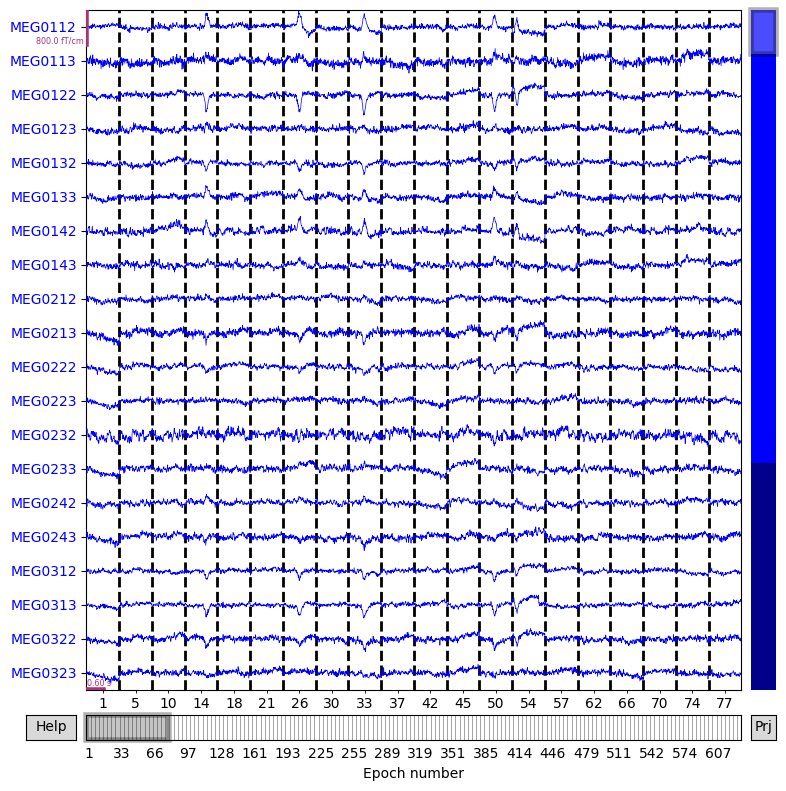

In [129]:
#Pick only MEG channels
epochs.pick_types(meg=True, eog=False, ias=False, emg=False, misc=False, stim=False, syst=False)

#show the epochs
epochs.plot()

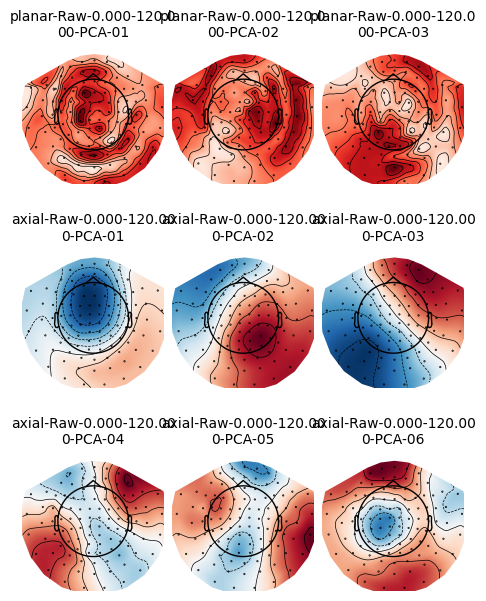

Projections have already been applied. Setting proj attribute to True.


<Epochs | 158 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~448.1 MB, data loaded,
 'low_confidence': 79
 'high_confidence': 79>

In [136]:
# %% SSP PROJECTIONS
#SSP projectors are calculated to remove environmental noise from the MEG signal. Read more here: https://mne.tools/stable/auto_tutorials/preprocessing/45_projectors_background.html#tut-projectors-background
#Visualize the projectors that contain signal from outside the head
mne.viz.plot_projs_topomap(epochs.info["projs"], epochs.info)

#apply the projections
epochs.apply_proj()

In [137]:
# %% ARRAY OF INTEREST FOR CLASSIFICATIION

X = epochs.get_data()
y = epochs.events[:, 2]   #Choose the last column

times = epochs[0].times # get time points for later

In [139]:
#%% SIMPLE CLASSIFICATION
#Set functions for classification
import numpy as np

def get_indices(y, triggers):
    indices = list()
    for trigger_index, trigger in enumerate(y):
        if trigger in triggers:
            indices.append(trigger_index)
            
    return indices

def equalize_number_of_indices(): # write this yourself
    pass

def simple_classication(X, y, triggers, penalty='none', C=1.0):

    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score, StratifiedKFold
    
    n_samples = X.shape[2]
    indices = get_indices(y, triggers)
    # equalize_number_of_indices()
    X = X[indices, :, :]
    y = y[indices]
    logr = LogisticRegression(penalty=penalty, C=C, solver='newton-cg')
    sc = StandardScaler() # especially necessary for sensor space as
                          ## magnetometers
                          # and gradiometers are on different scales 
                          ## (T and T/m)
    cv = StratifiedKFold()
    
    mean_scores = np.zeros(n_samples)
    
    for sample_index in range(n_samples):
        this_X = X[:, :, sample_index]
        sc.fit(this_X)
        this_X_std = sc.transform(this_X)
        scores = cross_val_score(logr, this_X_std, y, cv=cv)
        mean_scores[sample_index] = np.mean(scores)
        #print(sample_index)
        
    return mean_scores

def plot_classfication(times, mean_scores, title=None):

    plt.figure()
    plt.plot(times, mean_scores)
    plt.hlines(0.50, times[0], times[-1], linestyle='dashed', color='k')
    plt.ylabel('Proportion classified correctly')
    plt.xlabel('Time (s)')
    if title is None:
        pass
    else:
        plt.title(title)
    plt.show()


In [140]:
#%% RUN FUNCTION
#More information about L2 penalty in logistic regression to prevent overfitting: https://www.geeksforgeeks.org/what-is-l2-penalty-in-logistic-regression/
#Classify based on two different trigger events
sensor_conf_deck1 = simple_classication(X,
                                  y, triggers=[300, 301],
                                  penalty='l2', C=1e-3)

In [ ]:
#%% PLOT
plot_classfication(times, sensor_vis_win_vs_loss_deck1,
                   title='Deck 1: Confident vs not')

#plot_classfication(times, sensor_vis_win_vs_loss_deck4,
#                   title='Deck 4: win vs loss screen')